<a href="https://colab.research.google.com/github/Isha-0917/45DP6/blob/main/45DP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

In [2]:
df=pd.read_csv('/content/plant_diseases_dataset.csv')
df.head()

,Plant Name,Disease,Severity,Region,Days Since Detection,Treatment Status,Yield Impact (%)
0,Wheat,Root Rot,Medium,West,10,Untreated,6.37
1,Rose,Mosaic Virus,Low,North,17,Treated,42.45
2,Wheat,Root Rot,Critical,North,27,Treated,48.05
3,Rose,Root Rot,Medium,East,18,Treated,43.00
4,Wheat,Rust,Low,East,21,Untreated,46.04


## DATA PREPROCESSING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Plant Name            200 non-null    object 
 1   Disease               200 non-null    object 
 2   Severity              200 non-null    object 
 3   Region                200 non-null    object 
 4   Days Since Detection  200 non-null    int64  
 5   Treatment Status      200 non-null    object 
 6   Yield Impact (%)      200 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 11.1+ KB


In [4]:
df.describe()

,Days Since Detection,Yield Impact (%)
count,200.000000,200.00000
mean,15.550000,29.03795
std,8.736655,12.90088
min,1.000000,5.39000
25%,8.000000,17.18750
50%,16.000000,29.92000
75%,23.000000,40.49000
max,30.000000,49.93000


In [5]:
df.dtypes

,0
Plant Name,object
Disease,object
Severity,object
Region,object
Days Since Detection,int64
Treatment Status,object
Yield Impact (%),float64


In [6]:
df.shape

(200, 7)

In [7]:
df.columns

Index(['Plant Name', 'Disease', 'Severity', 'Region', 'Days Since Detection',
       'Treatment Status', 'Yield Impact (%)'],
      dtype='object')

In [8]:
df.isnull().sum()

,0
Plant Name,0
Disease,0
Severity,0
Region,0
Days Since Detection,0
Treatment Status,0
Yield Impact (%),0


In [9]:
df.duplicated().sum()

0

## EDA

In [10]:
# Define features and target
x = df.drop(columns=["Yield Impact (%)"])
y = df["Yield Impact (%)"]

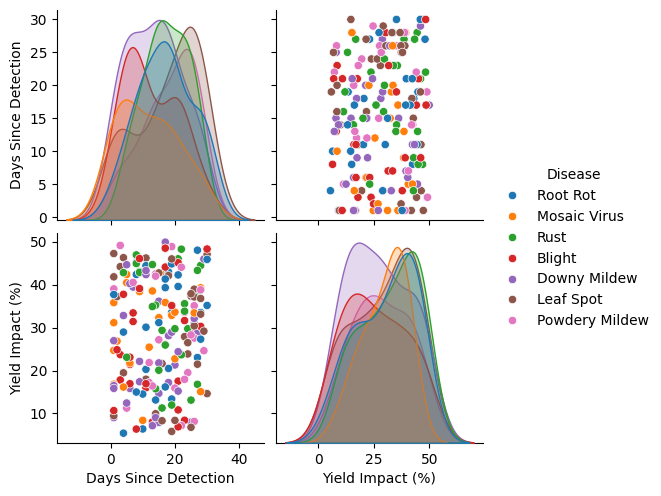

In [11]:
sns.pairplot(data=df, hue='Disease')

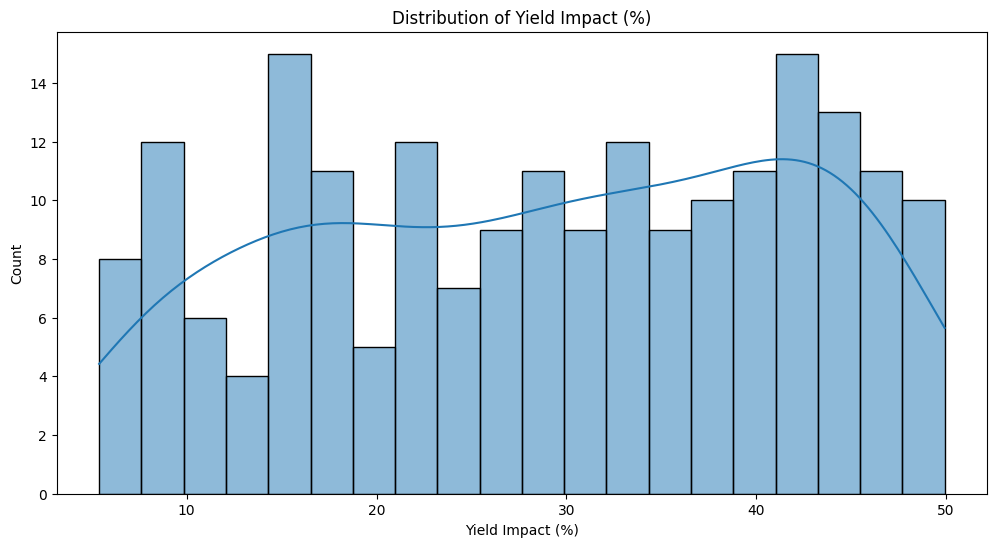

In [12]:

plt.figure(figsize=(12, 6))
sns.histplot(df["Yield Impact (%)"], bins=20, kde=True)
plt.title("Distribution of Yield Impact (%)")
plt.show()

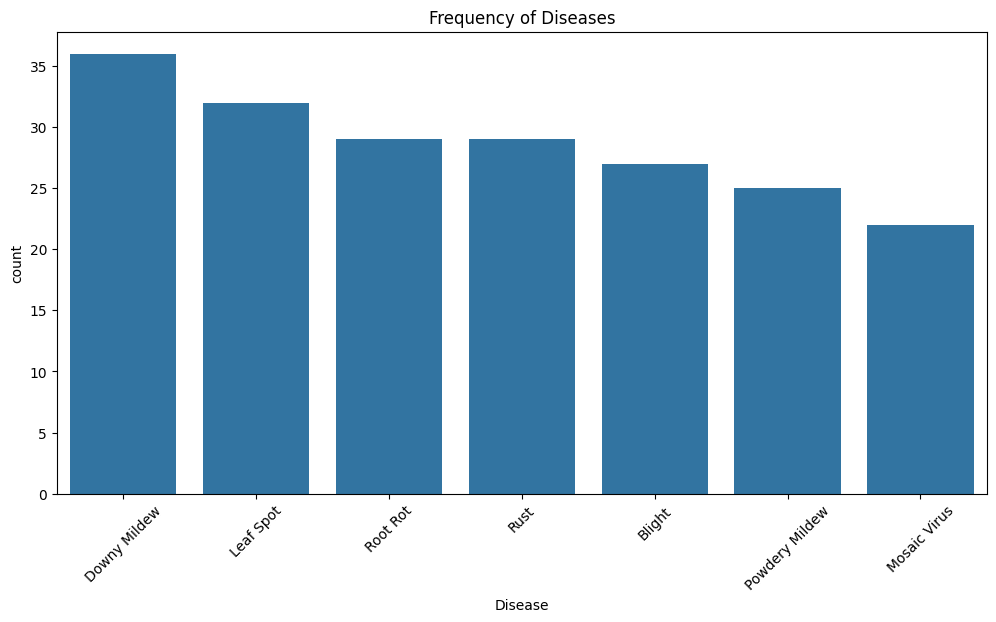

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Disease", data=df, order=df["Disease"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Frequency of Diseases")
plt.show()

## OHE HOT ENCODING

In [14]:
# Encode categorical variables
label_encoders = {}
for col in ["Plant Name", "Disease", "Severity", "Region", "Treatment Status"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [15]:
# Define features and target
x = df.drop(columns=["Yield Impact (%)"])
y = df["Yield Impact (%)"]

In [16]:
x

,Plant Name,Disease,Severity,Region,Days Since Detection,Treatment Status
0,7,5,3,4,10,2
1,5,3,2,2,17,1
2,7,5,0,2,27,1
3,5,5,3,1,18,1
4,7,6,2,1,21,2
...,...,...,...,...,...,...
195,4,2,0,0,16,1
196,3,0,2,1,11,2
197,2,1,3,2,11,1
198,3,6,2,4,20,1


## OUTLIER DETECTION

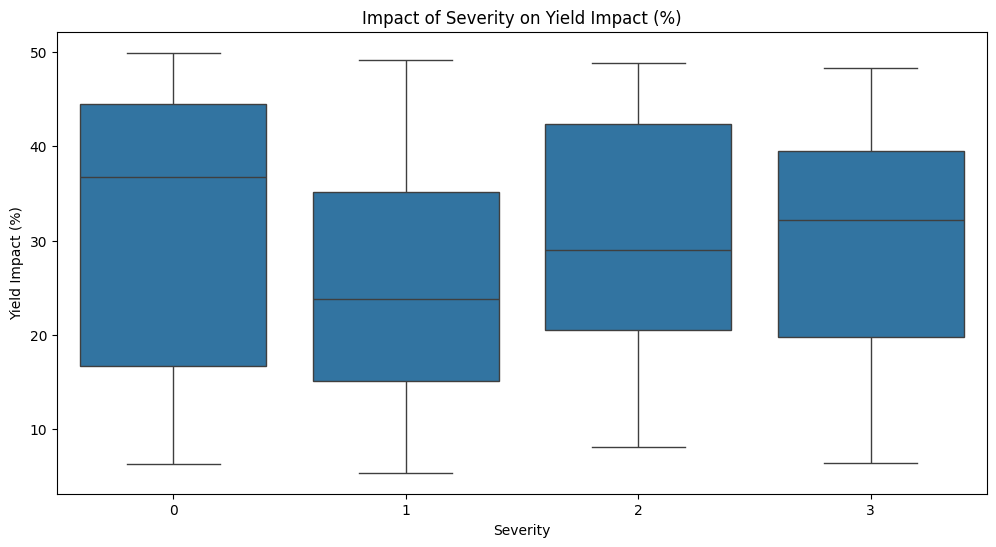

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Severity"], y=df["Yield Impact (%)"])
plt.title("Impact of Severity on Yield Impact (%)")
plt.show()

## FEATURE SELECTION

In [18]:
skf=SelectKBest(k=5, score_func=chi2)

In [19]:
skf

SelectKBest(k=5, score_func=<function chi2 at 0x7b3a68124d60>)

In [21]:
# Scale numerical features
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [22]:
x_scaled.shape

(200, 6)

## CROSS VALIDATION

In [23]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
x_train.shape, y_train.shape

((160, 6), (160,))

In [25]:
x_test.shape, y_test.shape

((40, 6), (40,))

In [26]:
y.value_counts()

,count
Yield Impact (%),
9.02,2
16.92,2
48.89,2
29.74,2
33.43,2
...,...
17.19,1
39.03,1
39.60,1


## BUILD THE MODEL

In [27]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [29]:
# Best model from grid search
best_model = grid_search.best_estimator_

In [30]:
# Predictions with optimized model
y_pred = best_model.predict(x_test)

In [31]:
# Evaluate optimized model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [32]:
print("Best Parameters:", grid_search.best_params_)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Mean Absolute Error: 12.51450568630691
R² Score: -0.11339991780855874


## SAVE THE MODEL

In [33]:
import joblib
joblib.dump(grid_search, 'rf_classifier.pkl')

['rf_classifier.pkl']

In [34]:
joblib.dump(scaler, 'rf_scaler.pkl')

['rf_scaler.pkl']

## LOAD THE MODEL

In [35]:
model=joblib.load('rf_classifier.pkl')

In [36]:
scaler=joblib.load('rf_scaler.pkl')

In [37]:
model.best_estimator_

RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                      n_estimators=300, random_state=42)